In [1]:
from src.model.model import RandomForest, CatBoost
from src.script.data import Data
from src.utils import *
from src.utils.constants import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
## Exploring and preparing the data for models

In [3]:
data = Data("Data/policy-number-2021-4-12.csv")

self.fileName =  Data/policy-number-2021-4-12.csv
   insPolicyNumber          insplanname location_state
0        R61071904            BCBS - FL             FL
1        R61071904            BCBS - FL             FL
2        R58498024            BCBS - FL             FL
3     C8M826237098            BCBS - FL             FL
4     TEA806579624            BCBS - FL             FL
5     APD820780244            BCBS - FL             FL
6  ICI514485623460            BCBS - FL             FL
7          1974057  DISABILITY ST OF FL             FL
8  YXP121954460001      PERSONAL CHOICE             PA
9     VMYH20297207            BCBS - FL             FL


In [4]:
data.init()

######################### Starting initializing dataset ######################### 

######################### Starting cleaning data ######################### 

0
######################### Removing NAs ######################### 

insPolicyNumber    119
insplanname          0
location_state       0
dtype: int64
           feature  num_unique
2   location_state           7
1      insplanname         156
0  insPolicyNumber      145264
######################### Removing Duplicates ######################### 

           feature  num_unique
2   location_state           7
1      insplanname         156
0  insPolicyNumber      145264
######################### Removing duplicate plans ######################### 

[]
AETNA
	 4547
BCBS
	 2192
FHCP MEDICARE
	 752
HUMANA
	 17143
KEYSTONE CAP
	 1611
MOLINA MARKETPLACE
	 0
SUNSHINE ALLWELL
	 0
SUPERIOR ALLWELL
	 0
UHC
	 2829
142
           feature  num_unique
2   location_state           7
1      insplanname         142
0  insPolicyNumber      145264


/home/michael/Develop/Phelix.AI/EMG-Primary/src/script/data.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[self.location] = location_state
/home/michael/Develop/Phelix.AI/EMG-Primary/src/script/data.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['length'] = length


In [5]:
data.value_count()

BCBS                           41174
MEDICARE                       19602
HUMANA                         17143
CIGNA                           7904
SUNSHINE AMBETTER               5100
                               ...  
TRAVELERS                          5
PITTS JR, REYNOLDS ATTY            5
ESURANCE                           4
NATIONWIDE AUTO INS                3
PEAK PROPERTY AND CASUALTY         3
Name: insplanname, Length: 142, dtype: int64


We then take a 20/80 split of the data for training and validation. 

In [6]:
data.generate_train_test()
X_train, y_train = data.get_train()
X_valid, y_valid = data.get_valid()

print(X_train.shape)

######################### 20/80 split Done ######################### 

(116517, 30)


## Data distribution grpahs 

### Location Distribution Graph
We first take a look at the location distribution graph, it can be seen that the data are primarily in 
the Florida state, which is perfectly reasonable since the source is primarily located in Florida. 
However, this presents a huge data bias which may require fixing later. 
   

In [7]:
loc_g  = data.location_state_graph()

######################### Location Distribution graph.png Saved ######################### 



### Plan Distribution Graph
We then take a look at the Plan Distribution graph, it can be seen that the data also share a large
bias in this feature, it is also worth noting that the plan names are confusingly labeled at best.
Many plan names such as 'AETNA' and 'AETNA Medicare' that are seemingly the same company but under
different policy names or variations thereof. This creates a huge problem as it drastically increases
the number of classes we are trying to classify which causes the model to underperform and causes
training problems.

In [8]:
plan_g = data.plan_distribution_graph()

######################### TOP 30 Plan Distribution graph.png Saved ######################### 



### Number vs Non-Number Distribution

/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


######################### Num vs Non-Num Distribution graph.png Saved ######################### 



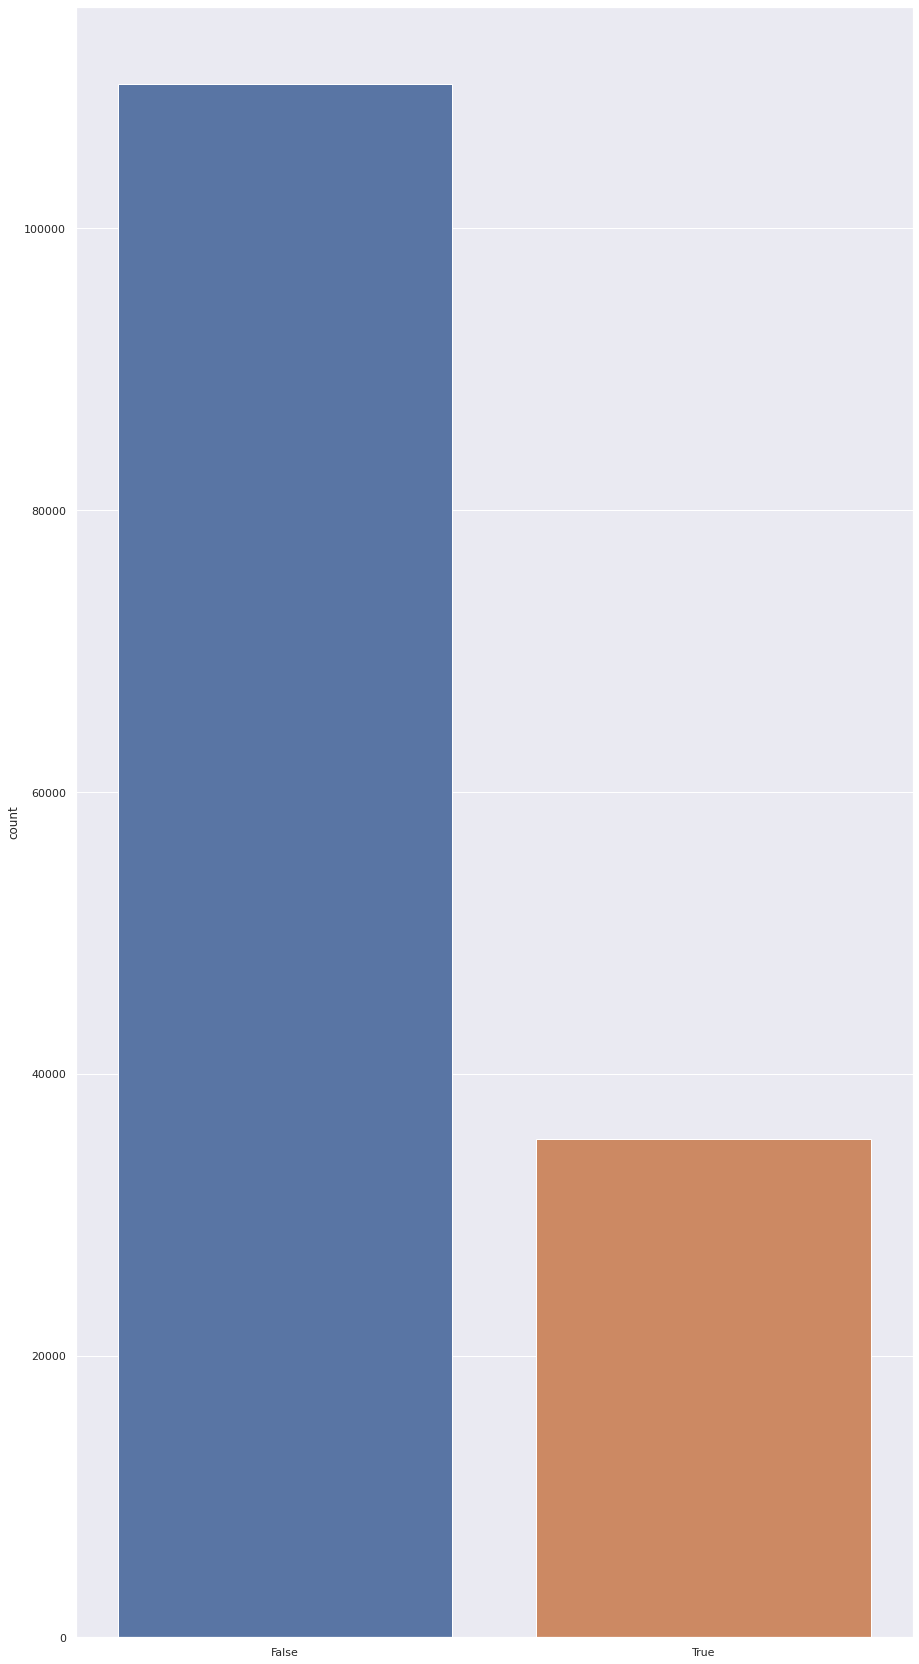

In [9]:
num_g = data.is_number_distribution_graph()

### Plan Length Distribution Graph

The following is the distribution of the overall plan length, it can be seen that the majority of
the plan have a length around 10. This could be useful in future assumptions regarding the model.

In [10]:
len_g= data.plan_length_distribution_graph()

######################### Plan Length Distribution.png Saved ######################### 



## Models

### RandomForest

In [11]:
randomForest = RandomForest()
randomForest.train(data)

In [12]:
randomForest.eval(data)

######################### Basic ACC Report ######################### 

ACC:  0.8971163748712667
Balanced ACC:  0.5428375230551099
######################### Imbalanced Classification Report ######################### 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.14      1.00      0.17      0.38      0.13         7
          1       0.00      0.00      1.00      0.00      0.00      0.00         5
          3       0.95      0.95      1.00      0.95      0.97      0.94       950
          4       0.00      0.00      1.00      0.00      0.00      0.00         2
          5       0.82      0.41      1.00      0.55      0.64      0.38        22
          6       1.00      1.00      1.00      1.00      1.00      1.00         3
          7       1.00      1.00      1.00      1.00      1.00      1.00         2
          8       0.95      0.95      1.00      0.95      0.97      0.94      1590
          9       0.96      1.00   

/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/skl

In [13]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [50,100,150],
    'criterion' :['entropy']
}
randomForest.tune(param_grid)

/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


######################### Finished Tuning ######################### 

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=500,
                       n_jobs=-1, random_state=327)
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'n_estimators': 500}


In [14]:
randomForest.eval(data)

######################### Basic ACC Report ######################### 

ACC:  0.8972880192241676
Balanced ACC:  0.5466136753184416
######################### Imbalanced Classification Report ######################### 

                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.14      1.00      0.17      0.38      0.13         7
          1       0.00      0.00      1.00      0.00      0.00      0.00         5
          3       0.95      0.95      1.00      0.95      0.97      0.94       950
          4       0.00      0.00      1.00      0.00      0.00      0.00         2
          5       0.82      0.41      1.00      0.55      0.64      0.38        22
          6       1.00      1.00      1.00      1.00      1.00      1.00         3
          7       1.00      1.00      1.00      1.00      1.00      1.00         2
          8       0.95      0.95      1.00      0.95      0.97      0.94      1590
          9       0.96      1.00   

/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/michael/Develop/Phelix.AI/EMG-Primary/py3.9/lib/python3.9/site-packages/skl

In [15]:
randomForest.get_importance()



List of feature importances in descending order:
Feature: number               Importance: 0.31
Feature: place                Importance: 0.19
Feature: length               Importance: 0.18
Feature: location_state       Importance: 0.08
Feature: H                    Importance: 0.05
Feature: U                    Importance: 0.03
Feature: A                    Importance: 0.01
Feature: C                    Importance: 0.01
Feature: F                    Importance: 0.01
Feature: M                    Importance: 0.01
Feature: O                    Importance: 0.01
Feature: P                    Importance: 0.01
Feature: R                    Importance: 0.01
Feature: S                    Importance: 0.01
Feature: T                    Importance: 0.01
Feature: V                    Importance: 0.01
Feature: W                    Importance: 0.01
Feature: X                    Importance: 0.01
Feature: B                    Importance: 0.0
Feature: D                    Importance: 0.0
Feature: E  